<table style="width:100%; border-collapse: collapse;">
  <tr>
    <td style="width:20%; vertical-align:middle;">
      <img src="LogoUVG.png" width="400"/>
    </td>
    <td style="text-align:left; vertical-align:middle;">
      <h2 style="margin-bottom: 0;">Universidad del Valle de Guatemala - UVG</h2>
      <h3 style="margin-top: 0;">Facultad de Ingeniería - Computación</h3>
      <p style="font-size: 16px; margin-bottom: 0; margin-top: -20px">
        <strong>Curso:</strong> CC3104 - Aprendizaje por Refuerzo 
        <strong>Sección:</strong> 10
      </p>
      <p style="font-size: 16px; margin: 0;"><strong>Laboratorio 3:</strong> MDP</p>
      <br>
      <p style="font-size: 15px; margin: 0;"><strong>Autores:</strong></p>
      <ul style="margin-top: 5px; padding-left: 20px; font-size: 15px;">
        <li>Diego Alexander Hernández Silvestre - <strong>21270</strong></li>
        <li>Linda Inés Jiménez Vides - <strong>21169</strong></li>
        <li>Mario Antonio Guerra Morales - <strong>21008</strong></li>
      </ul>
    </td>
  </tr>
</table>

## 📝 Task 1
Responda a cada de las siguientes preguntas de forma clara y lo más completamente posible.
1. ¿Qué es Programación Dinámica y cómo se relaciona con RL?

- 

2. Explique en sus propias palabras el algoritmo de Iteración de Póliza.

- 

3. Explique en sus propias palabras el algoritmo de Iteración de Valor.

- 

4. En el laboratorio pasado, vimos que el valor de los premios obtenidos se mantienen constantes, ¿por qué?

## 📝 Task 2

El objetivo principal de este ejercicio es que simule un MDP que represente un robot que navega por un laberinto de cuadrículas de 3x3 y evalúe una política determinada. Por ello considere, a un robot navega por un laberinto de cuadrícula de 3x3. El robot puede moverse en cuatro direcciones: arriba, abajo, izquierda y derecha. El objetivo es navegar desde la posición inicial hasta la posición de meta evitando obstáculos. El robot recibe una recompensa cuando alcanza la meta y una penalización si choca con un obstáculo.

El laberinto es el siguiente:

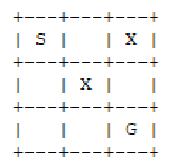

Donde:

● S = punto de inicio

● G = punto de meta

● X = son obstáculos

Instrucciones:

● Defina los componentes del MDP:

○ Estados: S = {0, 1, 2, 3, 4, 5, 6, 7, 8}, donde cada número representa una celda del laberinto.

○ Acciones: A = {arriba, abajo, izquierda, derecha}

○ Probabilidades de transición: P(s' | s, a)

○ Recompensas: R(s, a, s')




In [1]:
import numpy as np

states = list(range(9)) # Lista de estados
actions = ['up', 'down', 'left', 'right'] # Acciones que puede realizar.
start_state = 0 # Estado inicial
goal_state = 8 # Estado final
obstacles = [2, 4] # Obstáculos

def state_to_coords(state):
    return (state // 3, state % 3)

def coords_to_state(row, col):
    return row * 3 + col

P = {} # Probabilidades de transición
R = {} # Recompensas

Matriz de transición:

○ Defina las probabilidades de transición P como un diccionario donde P[s][a] asigna los siguientes estados s' a sus probabilidades.

In [2]:
for s in states:
    if s in obstacles or s == goal_state:
        continue
    P[s] = {}
    row, col = state_to_coords(s)

    for a in actions:
        P[s][a] = {}
        next_row, next_col = row, col

        if a == 'up': next_row -= 1
        elif a == 'down': next_row += 1
        elif a == 'left': next_col -= 1
        elif a == 'right': next_col += 1

        if 0 <= next_row < 3 and 0 <= next_col < 3:
            s_prime = coords_to_state(next_row, next_col)
            if s_prime in obstacles:
                s_prime = s  # rebota
        else:
            s_prime = s  # rebota

        P[s][a][s_prime] = 1.0

Función de recompensa:

○ Defina las recompensas R como un diccionario donde R[s][a][s'] da la recompensa por la transición del estado s al estado s' mediante la acción a.

In [3]:
for s in states:
    if s in obstacles or s == goal_state:
        continue
    R[s] = {}
    row, col = state_to_coords(s)

    for a in actions:
        R[s][a] = {}

        next_row, next_col = row, col
        if a == 'up': next_row -= 1
        elif a == 'down': next_row += 1
        elif a == 'left': next_col -= 1
        elif a == 'right': next_col += 1

        if 0 <= next_row < 3 and 0 <= next_col < 3:
            s_prime = coords_to_state(next_row, next_col)
            if s_prime in obstacles:
                s_prime = s
                reward = -1
            elif s_prime == goal_state:
                reward = 10
            else:
                reward = -0.1
        else:
            s_prime = s
            reward = -1

        R[s][a][s_prime] = reward

Inicializar función de valor:

○ Inicialice la función de valor V para todos los estados en 0.

In [4]:
V = np.zeros(len(states))
print(V.reshape((3, 3)))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Algoritmo de iteración de valor:

○ Implemente el algoritmo de iteración de valores para actualizar la función de valor V y encontrar la política óptima.

○ Usa un factor de descuento 𝛾 de 0,9.

○ La iteración debe detenerse cuando el cambio máximo en la función de valor sea menor que un umbral (por ejemplo, 0,001).

In [5]:
gamma = 0.9
theta = 0.001

def value_iteration():
    V = np.zeros(len(states))
    policy = np.array([""] * len(states))
    while True:
        delta = 0
        for s in states:
            if s in obstacles or s == goal_state:
                continue
            v = V[s]
            max_value = float('-inf')
            best_action = None
            for a in actions:
                total = 0
                for s_prime in P[s][a]:
                    total += P[s][a][s_prime] * (R[s][a][s_prime] + gamma * V[s_prime])
                if total > max_value:
                    max_value = total
                    best_action = a
            V[s] = max_value
            policy[s] = best_action
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    return V, policy

Extraiga la política óptima de la iteración de valor:

○ Después de converger, extraiga la política óptima de la función de valor.

In [ ]:
V_vi, policy_vi = value_iteration()

print("Función de valor óptima (VI):")
print(V_vi.reshape((3, 3)))

print("Política óptima (VI):")
print(policy_vi.reshape((3, 3)))

🔹 Función de valor óptima (VI):
[[ 7.019   6.2171  0.    ]
 [ 7.91    0.     10.    ]
 [ 8.9    10.      0.    ]]

🔸 Política óptima (VI):
[['d' 'l' '']
 ['d' '' 'd']
 ['r' 'r' '']]


Algoritmo de iteración de políticas:

○ Implemente el algoritmo de iteración de políticas para encontrar la política óptima.

○ Inicialice una política aleatoria.

○ Evaluación de políticas: evalúe la política actual para encontrar la función de valor.

○ Mejora de la política: actualice la política en función de la función de valor.

○ La iteración debería detenerse cuando la política ya no cambie.


In [ ]:
# Código aquí